 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [40]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [39]:
# Reading whale returns
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [42]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [43]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [44]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [45]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [65]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [67]:
#Data Types
sp500_df.dtypes

Close    object
dtype: object

In [66]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace('$','')
sp500_df.head()

C:\Users\ahoky\AppData\Local\Temp\ipykernel_19716\642743906.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace('$','')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [57]:
sp500_df["Close"] = sp500_df["Close"].astype('float64')
sp500_df.info()
sp500_df["Close"] = sp500_df["Close"].pct_change()
sp500_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [58]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [59]:
# Rename Column
sp500_df.columns = ["S&P 500"]
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# Alexis: these are the decimal values, * 100
all_returns = pd.concat([whale_pd,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

<AxesSubplot:xlabel='Date'>

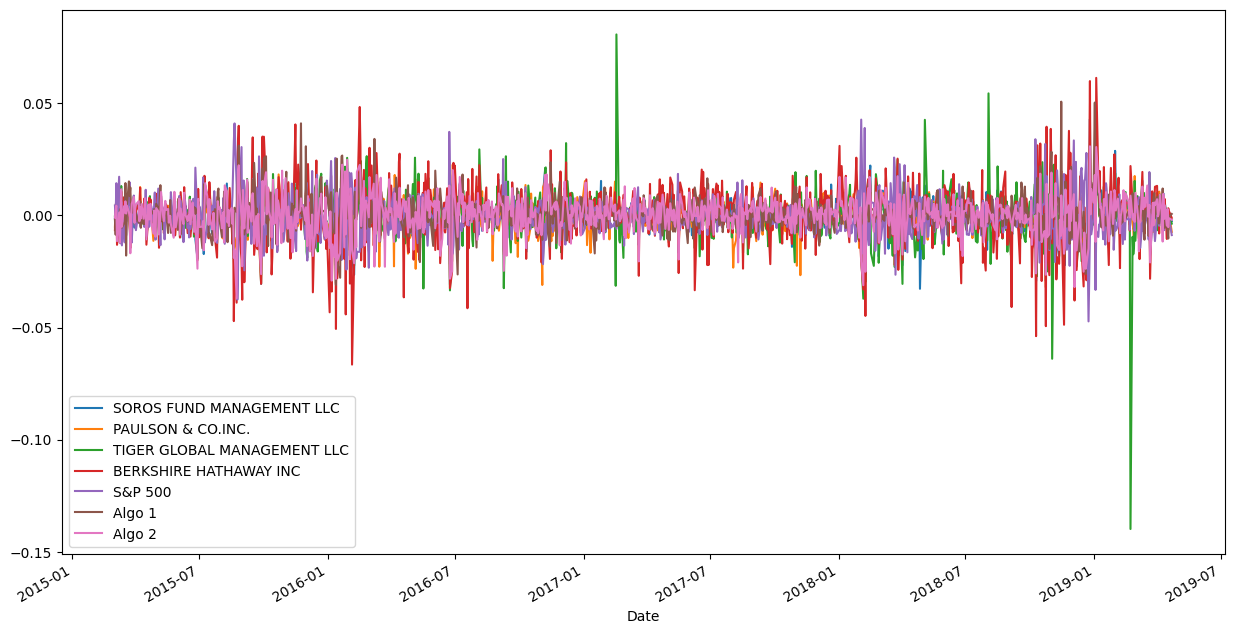

In [15]:
# Plot daily returns
all_returns.plot(figsize=(15,8))

<AxesSubplot:xlabel='Date'>

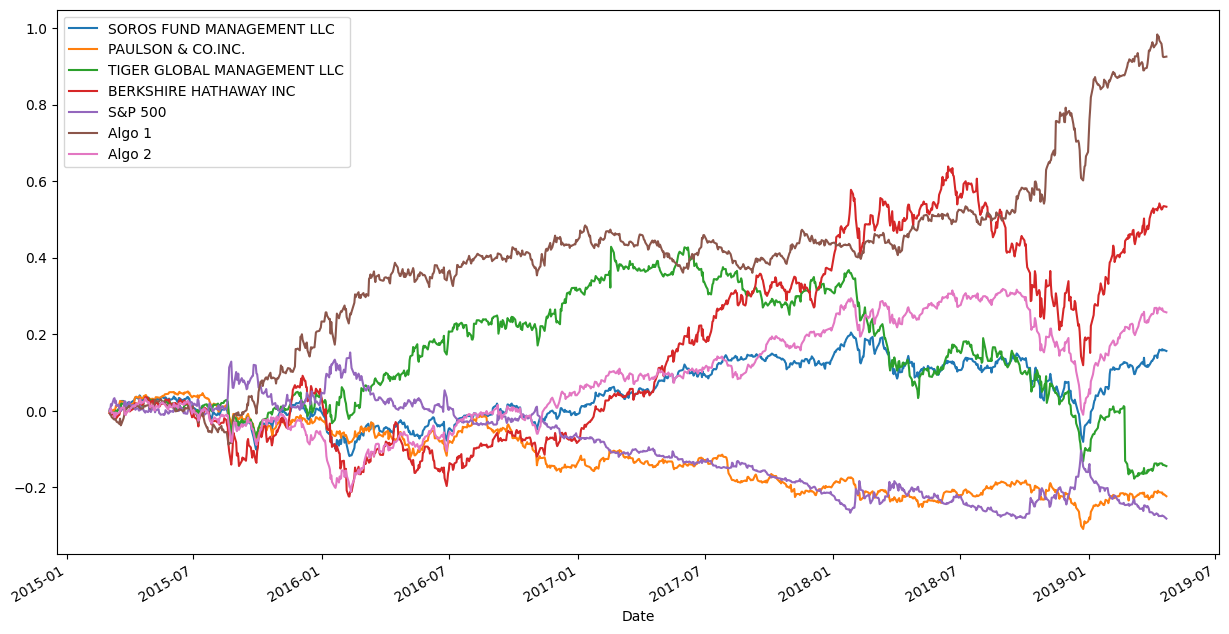

In [16]:
# Plot cumulative returns
cumulative_returns = (1+all_returns).cumprod() -1
cumulative_returns.plot(figsize=(15,8))

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [68]:
# Returns by Year

cum_returns_by_year = all_returns.groupby(all_returns.index.year).apply(lambda x: (1+x).cumprod() -1)
annual_returns_by_year = cum_returns_by_year.groupby(cum_returns_by_year.index.year).last()
annual_returns_by_year.head()

C:\Users\ahoky\AppData\Local\Temp\ipykernel_19716\417279123.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cum_returns_by_year = all_returns.groupby(all_returns.index.year).apply(lambda x: (1+x).cumprod() -1)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015,-0.003019,-0.023685,0.027644,0.034440,0.047261,0.233385,-0.065759
2016,-0.006991,-0.119136,0.278194,-0.114539,-0.108587,0.169350,0.113744
2017,0.144073,-0.069746,-0.000498,0.491562,-0.162467,-0.003228,0.162514
2018,-0.143357,-0.111315,-0.317783,-0.128091,0.074015,0.165843,-0.141432
2019,0.191705,0.092795,-0.044675,0.286969,-0.144409,0.148628,0.210516


In [69]:
# Top Portfolio returns for 2017
top_returns = annual_returns_by_year.loc[2017].sort_values(ascending = False)
top_returns

BERKSHIRE HATHAWAY INC         0.491562
Algo 2                         0.162514
SOROS FUND MANAGEMENT LLC      0.144073
TIGER GLOBAL MANAGEMENT LLC   -0.000498
Algo 1                        -0.003228
PAULSON & CO.INC.             -0.069746
S&P 500                       -0.162467
Name: 2017, dtype: float64

In [19]:
# Returns by Month
annual_returns_by_month = cum_returns_by_year.groupby([cum_returns_by_year.index.year,cum_returns_by_year.index.month]).last()
annual_returns_by_month.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date Date                                                  
2015 3                      0.017207            0.011306   
     4                      0.020510            0.028373   
     5                      0.028771            0.048732   
     6                      0.007833            0.036748   
     7                     -0.007062            0.017783   

           TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  \
Date Date                                                                  
2015 3                        0.009419                0.002310  0.023348   
     4                        0.019890                0.014265 -0.000242   
     5                        0.018452                0.015281 -0.001871   
     6                       -0.005113               -0.005223  0.014614   
     7                        0.014955               -0.026778  0.004642   

             Algo 1    Algo 2  
Date Date                      
2015 3     0.012788 -0.000962  
     4     0.005529  0.008649  
     5     0.015020  0.009577  
     6     0.011742 -0.000518  
     7    -0.040424 -0.017092

In [20]:
# Top Portfolio Returns for December 2018
annual_returns_by_month.loc[2018,12].sort_values(ascending = False)

Algo 1                         0.165843
S&P 500                        0.074015
PAULSON & CO.INC.             -0.111315
BERKSHIRE HATHAWAY INC        -0.128091
Algo 2                        -0.141432
SOROS FUND MANAGEMENT LLC     -0.143357
TIGER GLOBAL MANAGEMENT LLC   -0.317783
Name: (2018, 12), dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

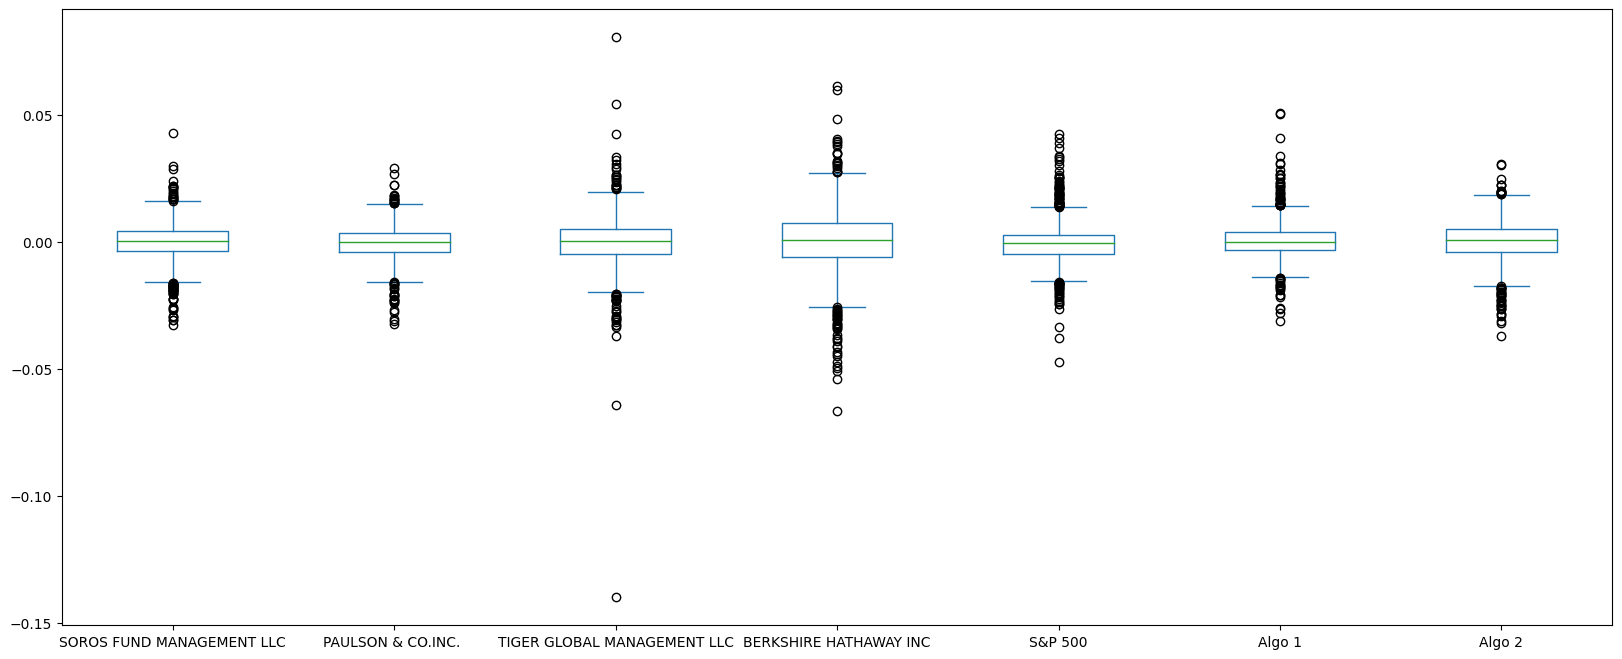

In [21]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(20,8))

In [70]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = all_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64

In [71]:
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std[daily_std > daily_std["S&P 500"]]
riskier

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [72]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500                        0.136313
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

<AxesSubplot:xlabel='Date'>

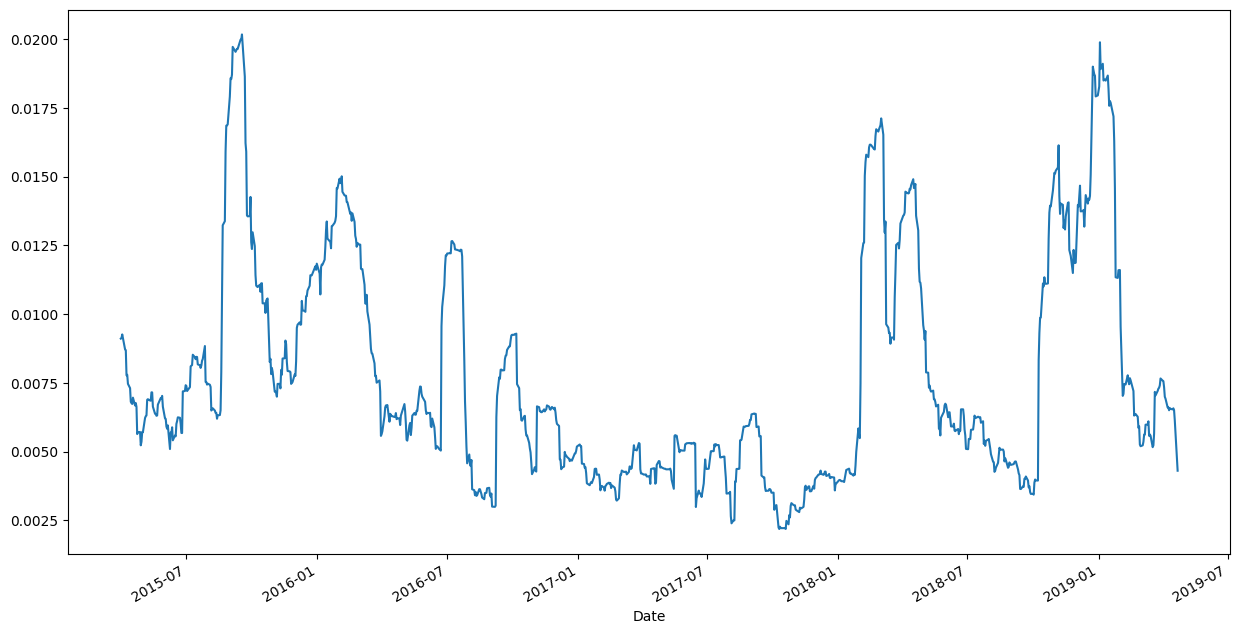

In [25]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
all_returns["S&P 500"].rolling(window=21).std().plot(figsize=(15,8))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.000574,0.320901,0.826730
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.013549,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,-0.001505,0.164114,0.507160
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,-0.013856,0.291678,0.687756
S&P 500,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.033963,-0.002192
Algo 1,0.320901,0.268631,0.164114,0.291678,-0.033963,1.000000,0.287852
Algo 2,0.826730,0.678085,0.507160,0.687756,-0.002192,0.287852,1.000000


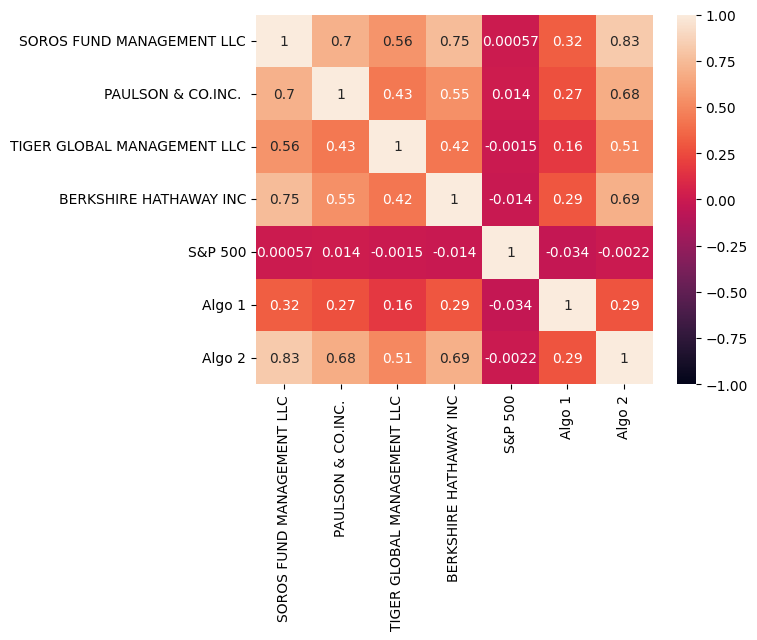

In [26]:
# Correlation
# Import seaborn only way to know how to use heatmap
import seaborn as sns
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

In [73]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P 500'])
variance = all_returns['S&P 500'].var()
algo1_beta = covariance / variance
algo1_beta

-0.02084648940890239

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [74]:
# Annualzied Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

<AxesSubplot:>

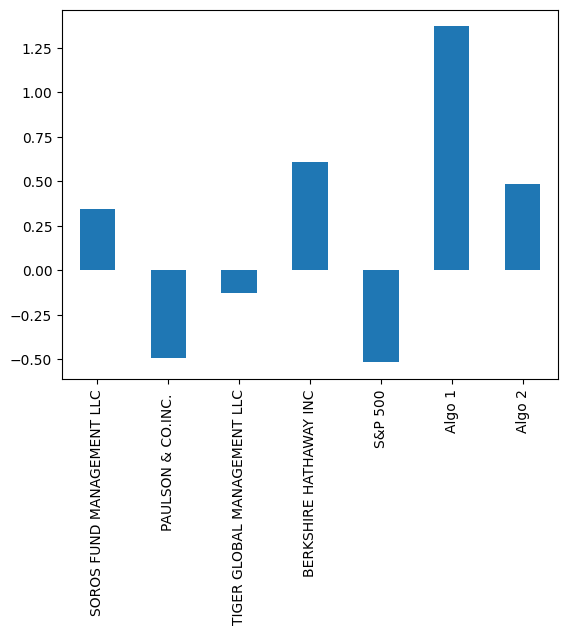

In [75]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [76]:
# Starting from 5-11-2018 to 5-9-2019 and going thru a loop for next few blocks
tickers = ['aapl','cost','goog']
combined_df = None
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"./Resources/{ticker}_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Trade DATE", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined_df = pd.concat([combined_df,ticker_df], axis="columns", join="inner")
    
combined_df


,AAPL,COST,GOOG
Date,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [77]:
# Drop Nulls
combined_df.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [78]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_returns = combined_df.dot(weights)
weighted_returns.columns = ['Custom']
#(weighted_returns.columns)
weighted_returns


Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
new_combined_df = pd.concat([all_returns,weighted_returns], axis="columns", join="inner")
#new_combined_df.rename(columns={0,"Custom"}, inplace=True)
new_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,0
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.006889,0.000915,0.001635,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333,0.002557,-0.002496,-0.006061


In [80]:
# Only compare dates where new, custom portfolio has dates
new_combined_df.dropna(inplace=True)
new_combined_df.tail

<bound method NDFrame.tail of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
2018-05-18                  -0.004357           -0.002672   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  \
Date                                                                        
2018-05-14            

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [81]:
# Risk
new_risk = new_combined_df.std()
new_risk.sort_values()

PAULSON & CO.INC.              0.007366
Algo 1                         0.008437
Algo 2                         0.008788
SOROS FUND MANAGEMENT LLC      0.009248
S&P 500                        0.009605
0                              0.013331
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
dtype: float64

<AxesSubplot:xlabel='Date'>

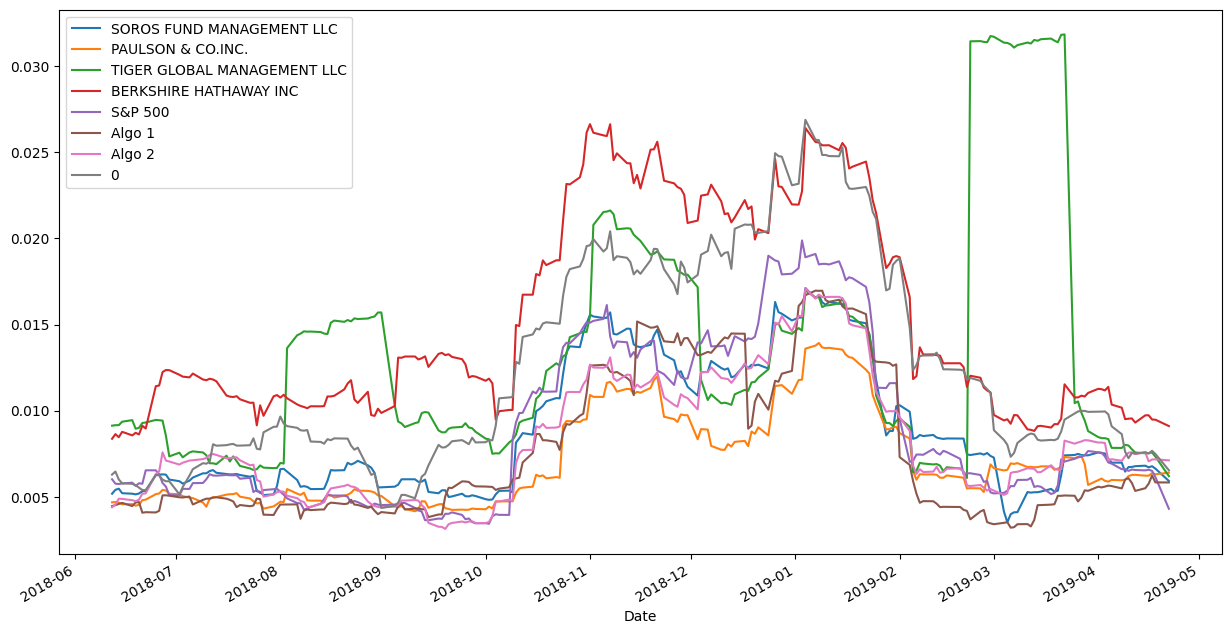

In [82]:
# Rolling
new_combined_df.rolling(window=21).std().plot(figsize=(15,8))

In [83]:
# Beta
corr = new_combined_df.corr()
daily_retrns = new_combined_df.pct_change()

corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,0
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,-0.028256,0.336909,0.862583,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,-0.059862,0.360727,0.783865,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.005881,0.113671,0.408402,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,-0.038832,0.325985,0.782054,0.800558
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,1.000000,-0.054478,-0.042540,0.005603
Algo 1,0.336909,0.360727,0.113671,0.325985,-0.054478,1.000000,0.364457,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,-0.042540,0.364457,1.000000,0.739020
0,0.732548,0.643828,0.390961,0.800558,0.005603,0.260331,0.739020,1.000000


In [84]:
# Annualzied Sharpe Ratios
sharpe_ratios = all_returns.mean()*252/(all_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
S&P 500                       -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
dtype: float64

## Include correlation analysis to determine which stocks (if any) are correlated

My portfolio is most correlated to Berkshire Hathaway Inc.